### エントロピー

In [3]:
import math
-(0.17*math.log2(0.17)+0.2*math.log2(0.2)+0.33*math.log2(0.33)+0.12*math.log2(0.12)+0.06*math.log2(0.06)+0.08*math.log2(0.08)+0.04*math.log2(0.04))

2.5146585782665962

### ハフマンコード ###

In [4]:
0.17*3+0.20*2+0.33*2+0.12*3+0.06*4+0.08*3+0.04*4

2.5700000000000003

### 英語のエントロピー

In [9]:
# アルファベットの各文字が等確率で出現するなら
# numpy不使用
import math
x=1/26
sum=0
for i in range(1,27):
    sum+=-x*math.log2(x)
print(sum)

# numpy使用
x=np.full(26, 1/26)
y=np.sum(-x*np.log2(x))
print(y)

4.700439718141092
4.700439718141092


### エントロピーの例１

In [10]:
import math
-(1/2*math.log2(1/2)+1/2*math.log2(1/2))

1.0

### エントロピーの例２

In [11]:
import numpy
x=np.full(6,1/6)
y=np.sum(-x*np.log2(x))
print(y)

2.584962500721156


### エントロピーの例２'

In [15]:
import numpy
dice=[1/3, 1/12, 1/12, 1/12, 1/12, 1/3]
x=np.array(dice)
y=np.sum(-x*np.log2(x))
print(y)

2.251629167387823


### エントロピーの例２''

In [25]:
import sys 
import numpy
epsilon=sys.float_info.epsilon # 非常に小さい値
dice=[1-5*epsilon, epsilon, epsilon, epsilon, epsilon, epsilon]
x=np.array(dice)
y=np.sum(-x*np.log2(x))
print(y)

5.93333105324156e-14


### 2元エントロピー関数

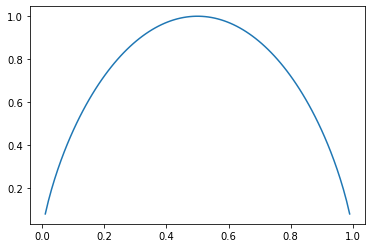

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.01,0.99,98)
y=np.array(-x*np.log2(x)-(1-x)*np.log2(1-x))
plt.plot(x,y)
plt.show()

xはコインの表が出る確率と考える．(1-x)は裏がでる確率． エントロピーが最大になるのはx=(1-x)=0.5の時（公平なコイン）で1bit． いかさまコイン（必ず表がでる）の場合はエントロピーは0bitになる